# Interactive raster analytics using Jupyter Dashboards 

The Python API, along with the [Jupyter Dashboard](http://jupyter-dashboards-layout.readthedocs.io/) project enables Python developers to quickly build and prototype interactive web apps. This sample illustrates one such app which can be used to detect the changes in vegetation between the two dates. Increases in vegetation are shown in green, and decreases are shown in magenta. 

This sample uses the fast on-the-fly processing power of raster functions available in the `raster` module of the Python API.

<blockquote>To run this sample you need `jupyter_dashboards` package in your conda environment. You can install it as shown below. For information on this, [refer to the install instructions](http://jupyter-dashboards-layout.readthedocs.io/en/latest/getting-started.html#installing-and-enabling)</blockquote>

    conda install jupyter_dashboards -c conda-forge

Using this Dashboard, you can distribute your raster processing algorithms using ArcGIS Image Server and Raster Analytics.

<img src="../../static/img/03_ra_app.gif">

### Import IPython Widgets and Display

In [1]:
from ipywidgets import widgets
from IPython.display import clear_output

### Connect to ArcGIS Online and Access the Landsat Services

In [2]:
from arcgis.gis import GIS
from arcgis.raster.functions import *

gis = GIS()

landsat_item = gis.content.search("title:Multispectral Landsat owner:esri", 'Imagery Layer')[0]
landsat = landsat_item.layers[0]

In [3]:
landsat_item

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>

### Create a Map and Add Landsat Layers

In [4]:
map1 = gis.map("California, USA")
map1

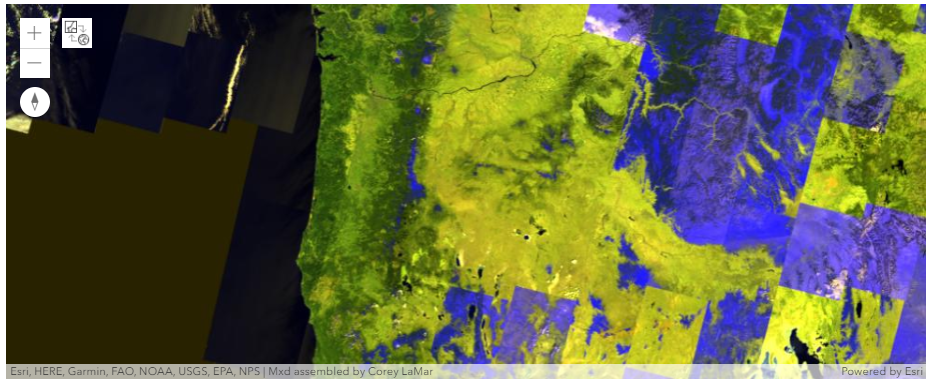

In [5]:
map1.add_layer(landsat)

###  Get RFTs from Landsat Service

In [6]:
rfts = []
for idx,props in enumerate(landsat.properties['rasterFunctionInfos']):
    rfts.append(landsat.properties['rasterFunctionInfos'][idx]['name'])

### Create a Dropdown from the RFTs

In [7]:
rft_select = widgets.Dropdown(
    options=rfts,
    value='None',
    description='Raster Function',
    disabled=False,
)

def on_rft_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        map1.remove_layers()
        map1.add_layer(landsat, {"imageServiceParameters" :{ "renderingRule": { "rasterFunction": rft_select.value}}})

rft_select.observe(on_rft_change)
display(rft_select)

Dropdown(description='Raster Function', index=20, options=('Agriculture with DRA', 'Bathymetric with DRA', 'Co…

## Create a List of AOIs or Study Areas We Might Want to Run Raster Analytics Over and Add Them to a Dropdown

In [8]:
from arcgis.geocoding import geocode
from arcgis.features import FeatureLayer

study_area_dict = {'California':'http://services.arcgis.com/PpEMp4p6SBYbe0zW/arcgis/rest/services/California_Counties/FeatureServer/0',
                   'Montana':'http://services.arcgis.com/iTQUx5ZpNUh47Geb/arcgis/rest/services/Montana_Mask/FeatureServer/0',
                   'Nevada':'http://services.arcgis.com/pGfbNJoYypmNq86F/arcgis/rest/services/28R04_Nevada_Region/FeatureServer/5',
                   'Oregon':'https://services.arcgis.com/uUvqNMGPm7axC2dD/arcgis/rest/services/Oregon_Boundary_generalized/FeatureServer/0',
                   'Texas':'http://services2.arcgis.com/5MVN2jsqIrNZD4tP/arcgis/rest/services/Texas_Outline/FeatureServer/0'}

study_areas = ['California',
               'Montana',
               'Nevada',
               'Oregon',
               'Texas']

country = widgets.Dropdown(
    options=study_areas,
    value='California',
    description='Region to Process:',
    disabled=False,
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        location = geocode(str(country.value) + ', USA')[0]
        map1.extent = location['extent']
        #fl = FeatureLayer(study_area_dict[country.value])
        #map1.extent = fl.properties['extent']
        #print("changed to %s" % change['new'])

country.observe(on_change)

display(country)

Dropdown(description='Region to Process:', options=('California', 'Montana', 'Nevada', 'Oregon', 'Texas'), val…

## Add A Button for Initializting a Raster Analytics Process

In [9]:
from datetime import datetime

def on_button_click(b):
    #map1.extentx = getextent
    clear_output()
    print("Job submitted at " + f"{datetime.now():%Y-%m-%d %H:%M:%S}")

button = widgets.Button(description="Run Raster Analytics", 
                        disabled=False,
                        button_style='success',
                        tooltip='Kick Off A Raster Analytics Job',
                        icon='check')
display(button)
button.on_click(on_button_click)

Button(button_style='success', description='Run Raster Analytics', icon='check', style=ButtonStyle(), tooltip=…